In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
df_train = pd.read_csv(r'data\train.csv')

In [5]:
df_test = pd.read_csv(r'data\test.csv')

In [6]:
df = pd.concat([df_train,df_test],axis = 0,ignore_index=True)

In [7]:
df.shape

(129880, 25)

In [8]:
df.drop(['Unnamed: 0','id'],axis = 1, inplace = True)

In [9]:
df.drop(['Type of Travel'],axis = 1,inplace = True)

In [10]:
df.head()

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [11]:
len(df.columns)

22

In [12]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

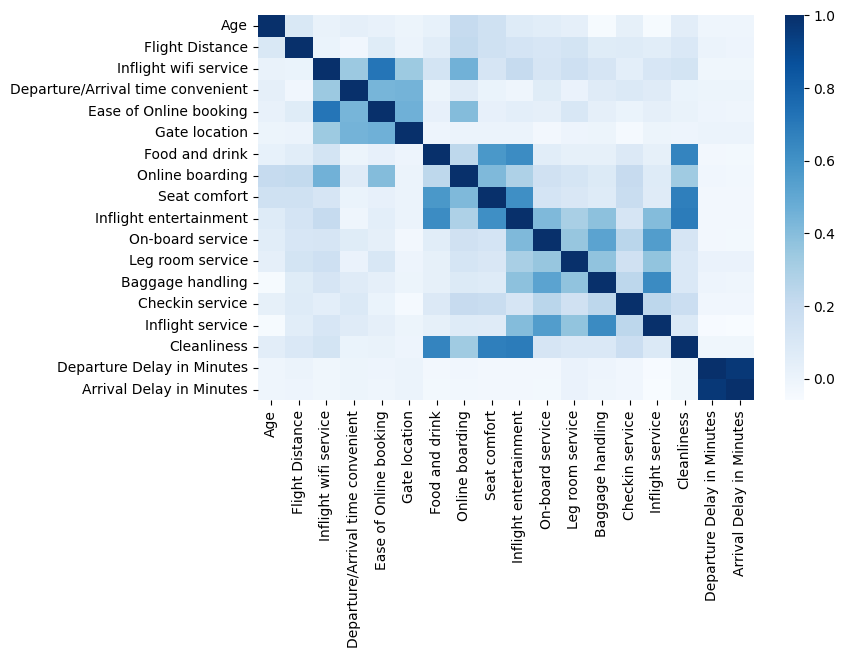

In [14]:
numeric_df = df.select_dtypes(include = 'number')
corr = numeric_df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,cmap = 'Blues')
plt.show()

In [15]:
# Dearture Delay and Arrival Delay : highly positively correlated -- if a flight departs late then it is likely to arrive late as well

In [16]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### Insights
###### Arrival Delay Column:
 * The minimum arrival delay is 0 (indicating no delay).
 * The maximum arrival delay is 1584.
###### Flight Distance Column:
 * The shortest flight distance in the dataset is 31.
 * The longest flight distance in the dataset is 4983.
###### Departure Delay Column:
 * The minimum departure delya is 0.
 * The maximum departure delay is 1592
###### Note
 * there appears to be outliers in the data as there is a significant difference between the third quartile(Q3) and the maximum value.

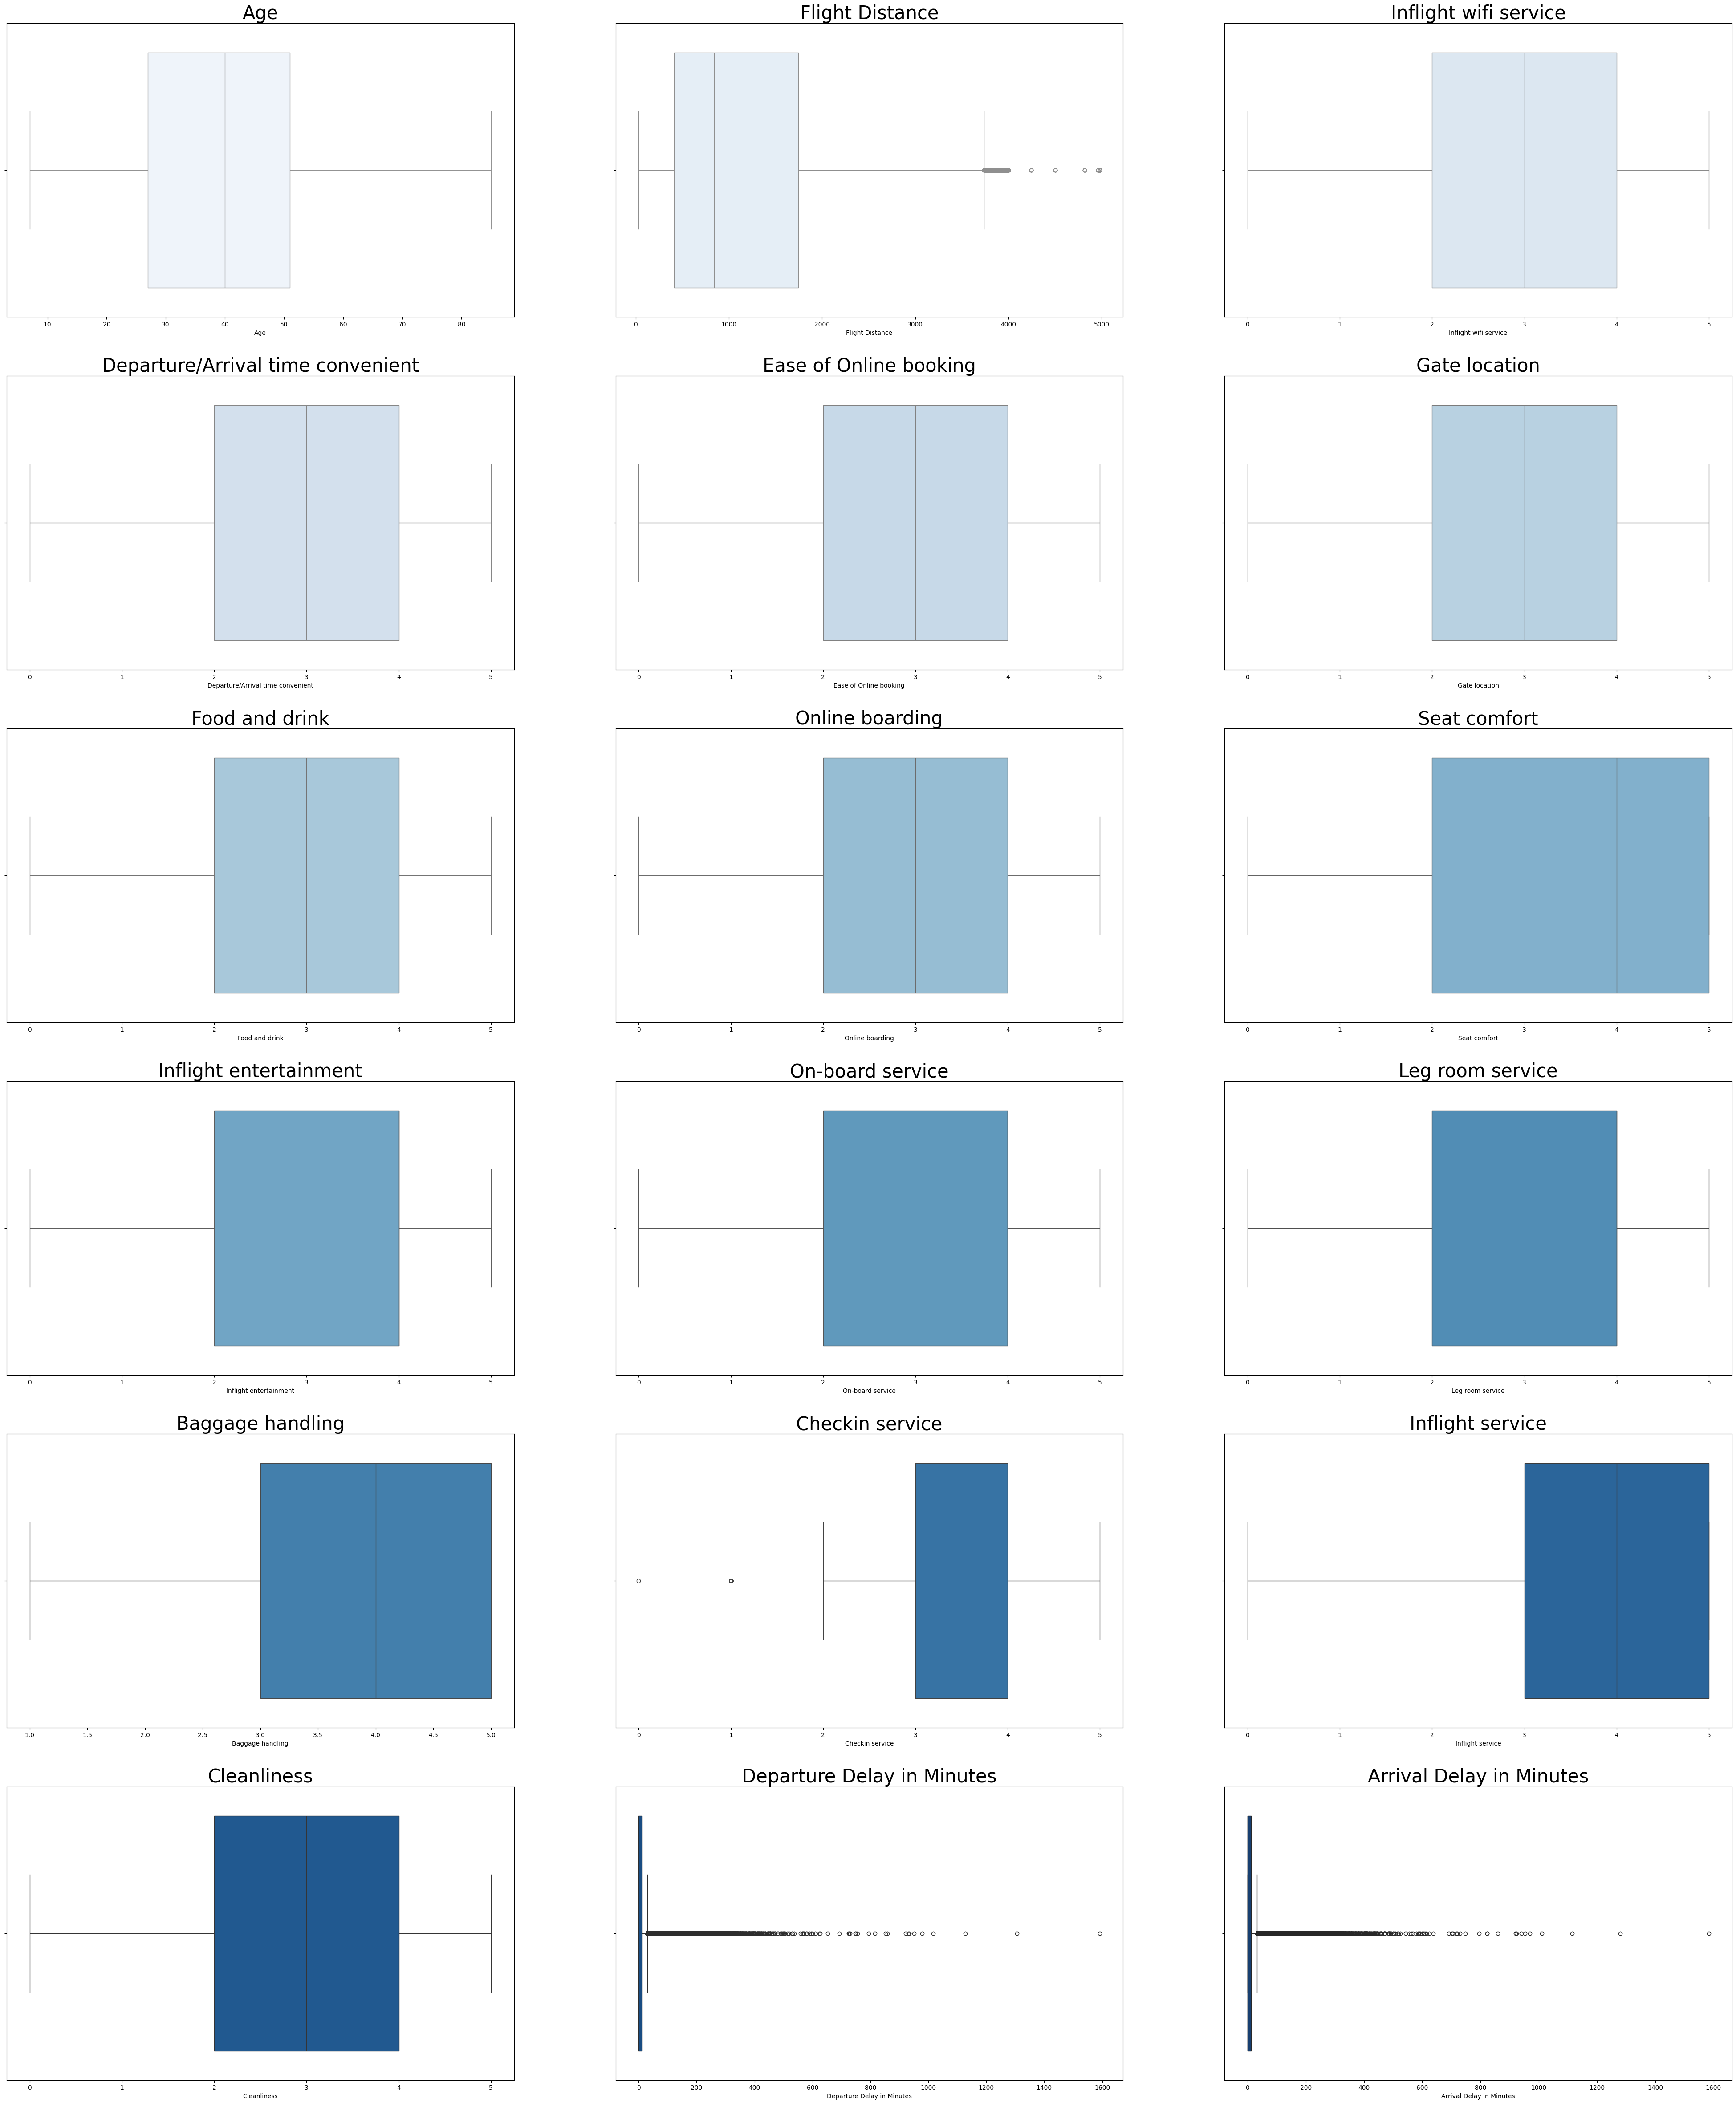

In [17]:
numerical = df.select_dtypes(include=['int','float'])
blue_palette = sns.color_palette('Blues', n_colors=len(numerical.columns))

fig,axes = plt.subplots(6,3, figsize=(50,60))
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
    sns.boxplot(x=numerical[col], ax = axes[i], color = blue_palette[i])
    axes[i].set_title(col,fontsize=30)
plt.show()

In [18]:
### these columns have outliers:
# 1. Departure Delay 
# 2. Arrival Delay
# 3. Check-In service
# 4. Flight Distance

In [19]:
def handle_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower = lower_bound, upper= upper_bound)
    return df

columns_to_handle = ['Departure Delay in Minutes','Arrival Delay in Minutes','Checkin service','Flight Distance']
df = handle_outliers(df,columns_to_handle)

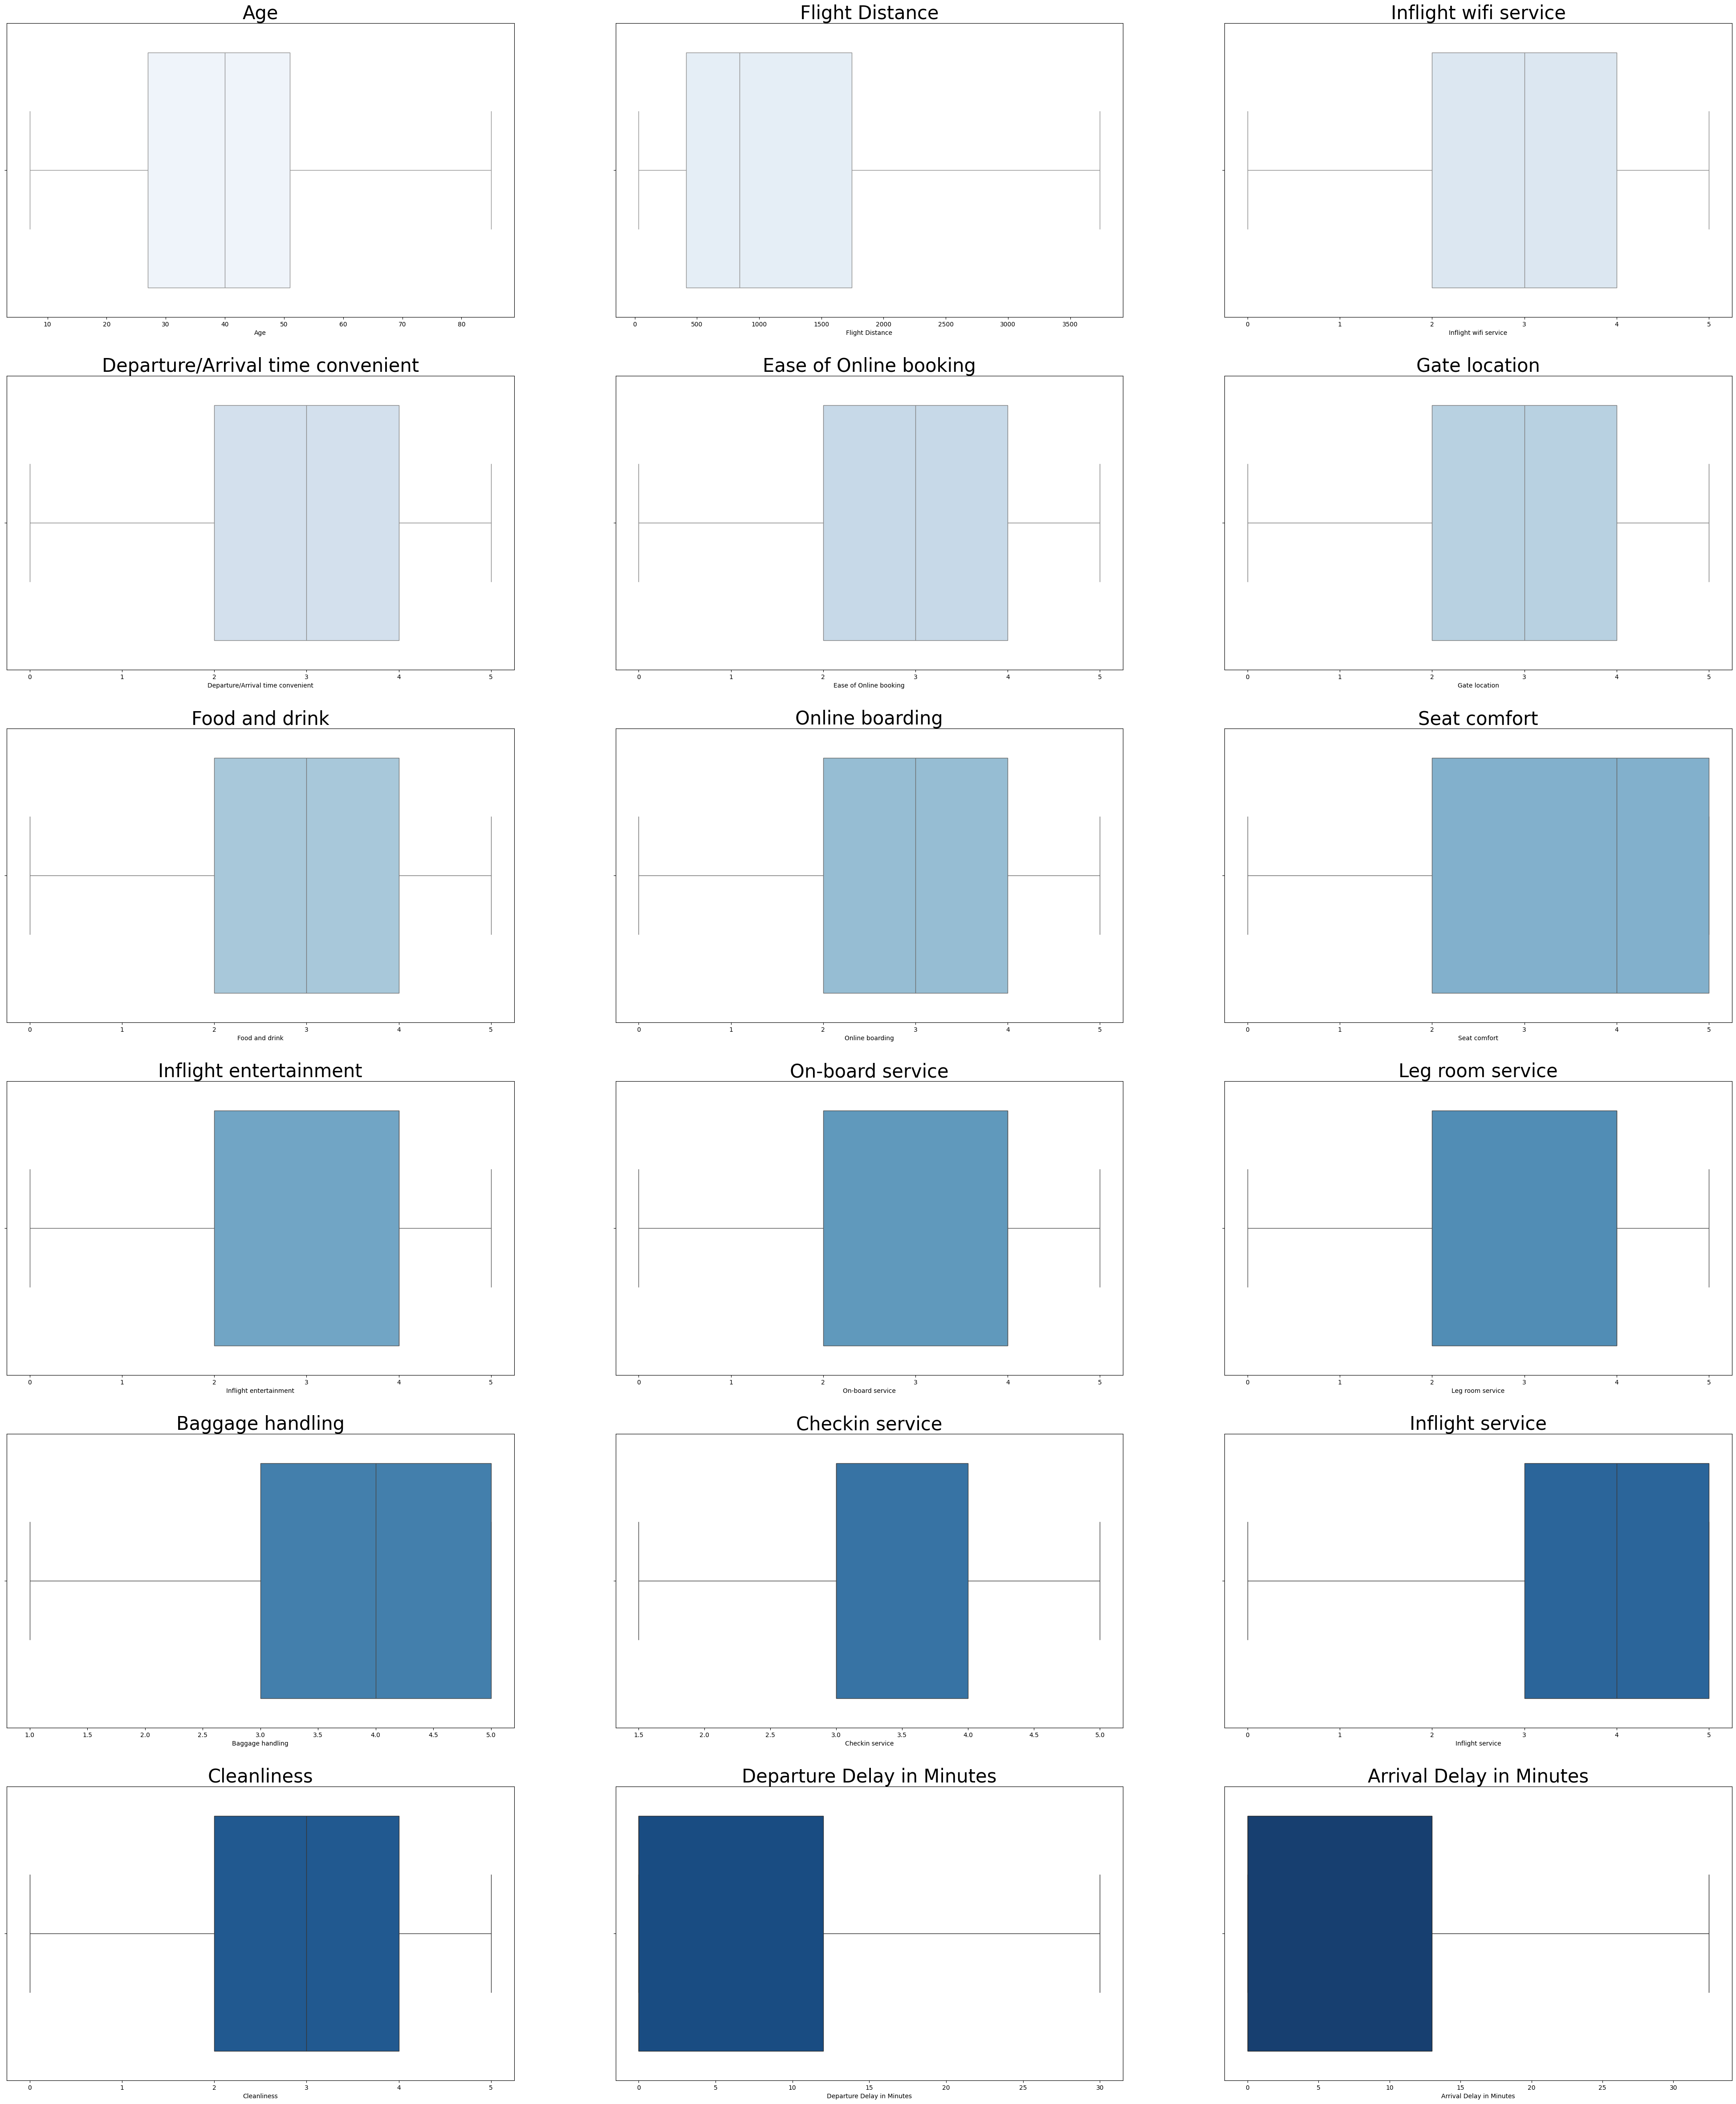

In [20]:
numerical = df.select_dtypes(include=['int','float'])
sns.color_palette('Blues', n_colors=len(numerical.columns))

fig,axes = plt.subplots(6,3, figsize=(50,60))
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
    sns.boxplot(x=numerical[col], ax = axes[i], color = blue_palette[i])
    axes[i].set_title(col,fontsize=30)
plt.show()

In [21]:
# handled null values of 'arrival delay in minutes'
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median)

In [22]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## EDA

In [23]:
new_df = df.copy()

In [24]:
new_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [25]:
columns_with_six_categories = new_df.columns[new_df.nunique() == 6]
columns_with_six_categories

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Inflight service',
       'Cleanliness'],
      dtype='object')

In [26]:
new_df['Cleanliness'].unique()

array([5, 1, 2, 3, 4, 0])

In [27]:
ordinal_mapping={
    0: 'Very Poor',
    1: 'Poor',
    2: 'Average',
    3: 'Good',
    4: 'Excellent',
    5: 'Outstanding'
}

In [28]:
new_df[columns_with_six_categories] = new_df[columns_with_six_categories].applymap(lambda x: ordinal_mapping.get(x,x) )

In [29]:
new_df.head()

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Eco Plus,460,Good,Excellent,Good,Poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,4,4.0,Outstanding,Outstanding,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business,235,Good,Average,Good,Good,Poor,Good,Poor,Poor,Poor,Outstanding,3,1.5,Excellent,Poor,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business,1142,Average,Average,Average,Average,Outstanding,Outstanding,Outstanding,Outstanding,Excellent,Good,4,4.0,Excellent,Outstanding,0,0.0,satisfied
3,Female,Loyal Customer,25,Business,562,Average,Outstanding,Outstanding,Outstanding,Average,Average,Average,Average,Average,Outstanding,3,1.5,Excellent,Average,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business,214,Good,Good,Good,Good,Excellent,Outstanding,Outstanding,Good,Good,Excellent,4,3.0,Good,Good,0,0.0,satisfied


In [30]:
new_df['Baggage handling'].unique()

array([4, 3, 5, 1, 2])

In [31]:
mapping = {
    1: 'Very Poor',
    2: 'Poor',
    3: 'Average',
    4: 'Good',
    5: 'Excellent'
}
new_df['Baggage handling']=new_df['Baggage handling'].apply(lambda x: mapping.get(x,x))

In [32]:
new_df['Baggage handling'].unique()

array(['Good', 'Average', 'Excellent', 'Very Poor', 'Poor'], dtype=object)

In [33]:
new_df['Checkin service'].unique()

array([4. , 1.5, 3. , 5. , 2. ])

In [34]:
mapping = {
    1.5: 'Very Poor',
    2.0: 'Poor',
    3.0: 'Average',
    4.0: 'Good',
    5.0: 'Excellent'
}
new_df['Checkin service'] = new_df['Checkin service'].apply(lambda x: mapping.get(x,x))

In [35]:
new_df['Checkin service'].unique()

array(['Good', 'Very Poor', 'Average', 'Excellent', 'Poor'], dtype=object)

In [36]:
new_df.head()

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Eco Plus,460,Good,Excellent,Good,Poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,Good,Good,Outstanding,Outstanding,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business,235,Good,Average,Good,Good,Poor,Good,Poor,Poor,Poor,Outstanding,Average,Very Poor,Excellent,Poor,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business,1142,Average,Average,Average,Average,Outstanding,Outstanding,Outstanding,Outstanding,Excellent,Good,Good,Good,Excellent,Outstanding,0,0.0,satisfied
3,Female,Loyal Customer,25,Business,562,Average,Outstanding,Outstanding,Outstanding,Average,Average,Average,Average,Average,Outstanding,Average,Very Poor,Excellent,Average,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business,214,Good,Good,Good,Good,Excellent,Outstanding,Outstanding,Good,Good,Excellent,Good,Average,Good,Good,0,0.0,satisfied


In [37]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Univariate EDA

In [38]:
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
categorical_columns = ['Gender', 'Customer Type', 'Class','Inflight wifi service', 
                       'Departure/Arrival time convenient', 
                       'Ease of Online booking', 'Gate location', 'Food and drink', 
                       'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                       'On-board service', 'Leg room service', 'Baggage handling', 
                       'Checkin service', 'Inflight service', 'Cleanliness']

In [39]:
# check for non numeric values in numerric columns
for col in numerical_columns:
    non_numeric_values = pd.to_numeric(df[col], errors='coerce').isna().sum()
    if non_numeric_values > 0:
        print(f"{col} contains {non_numeric_values} non-numeric values")

Arrival Delay in Minutes contains 393 non-numeric values


In [40]:
# convertion of non numeric values in 'Arrival Delay in minutes' to NaN
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# convertion of NaN values to numeric
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

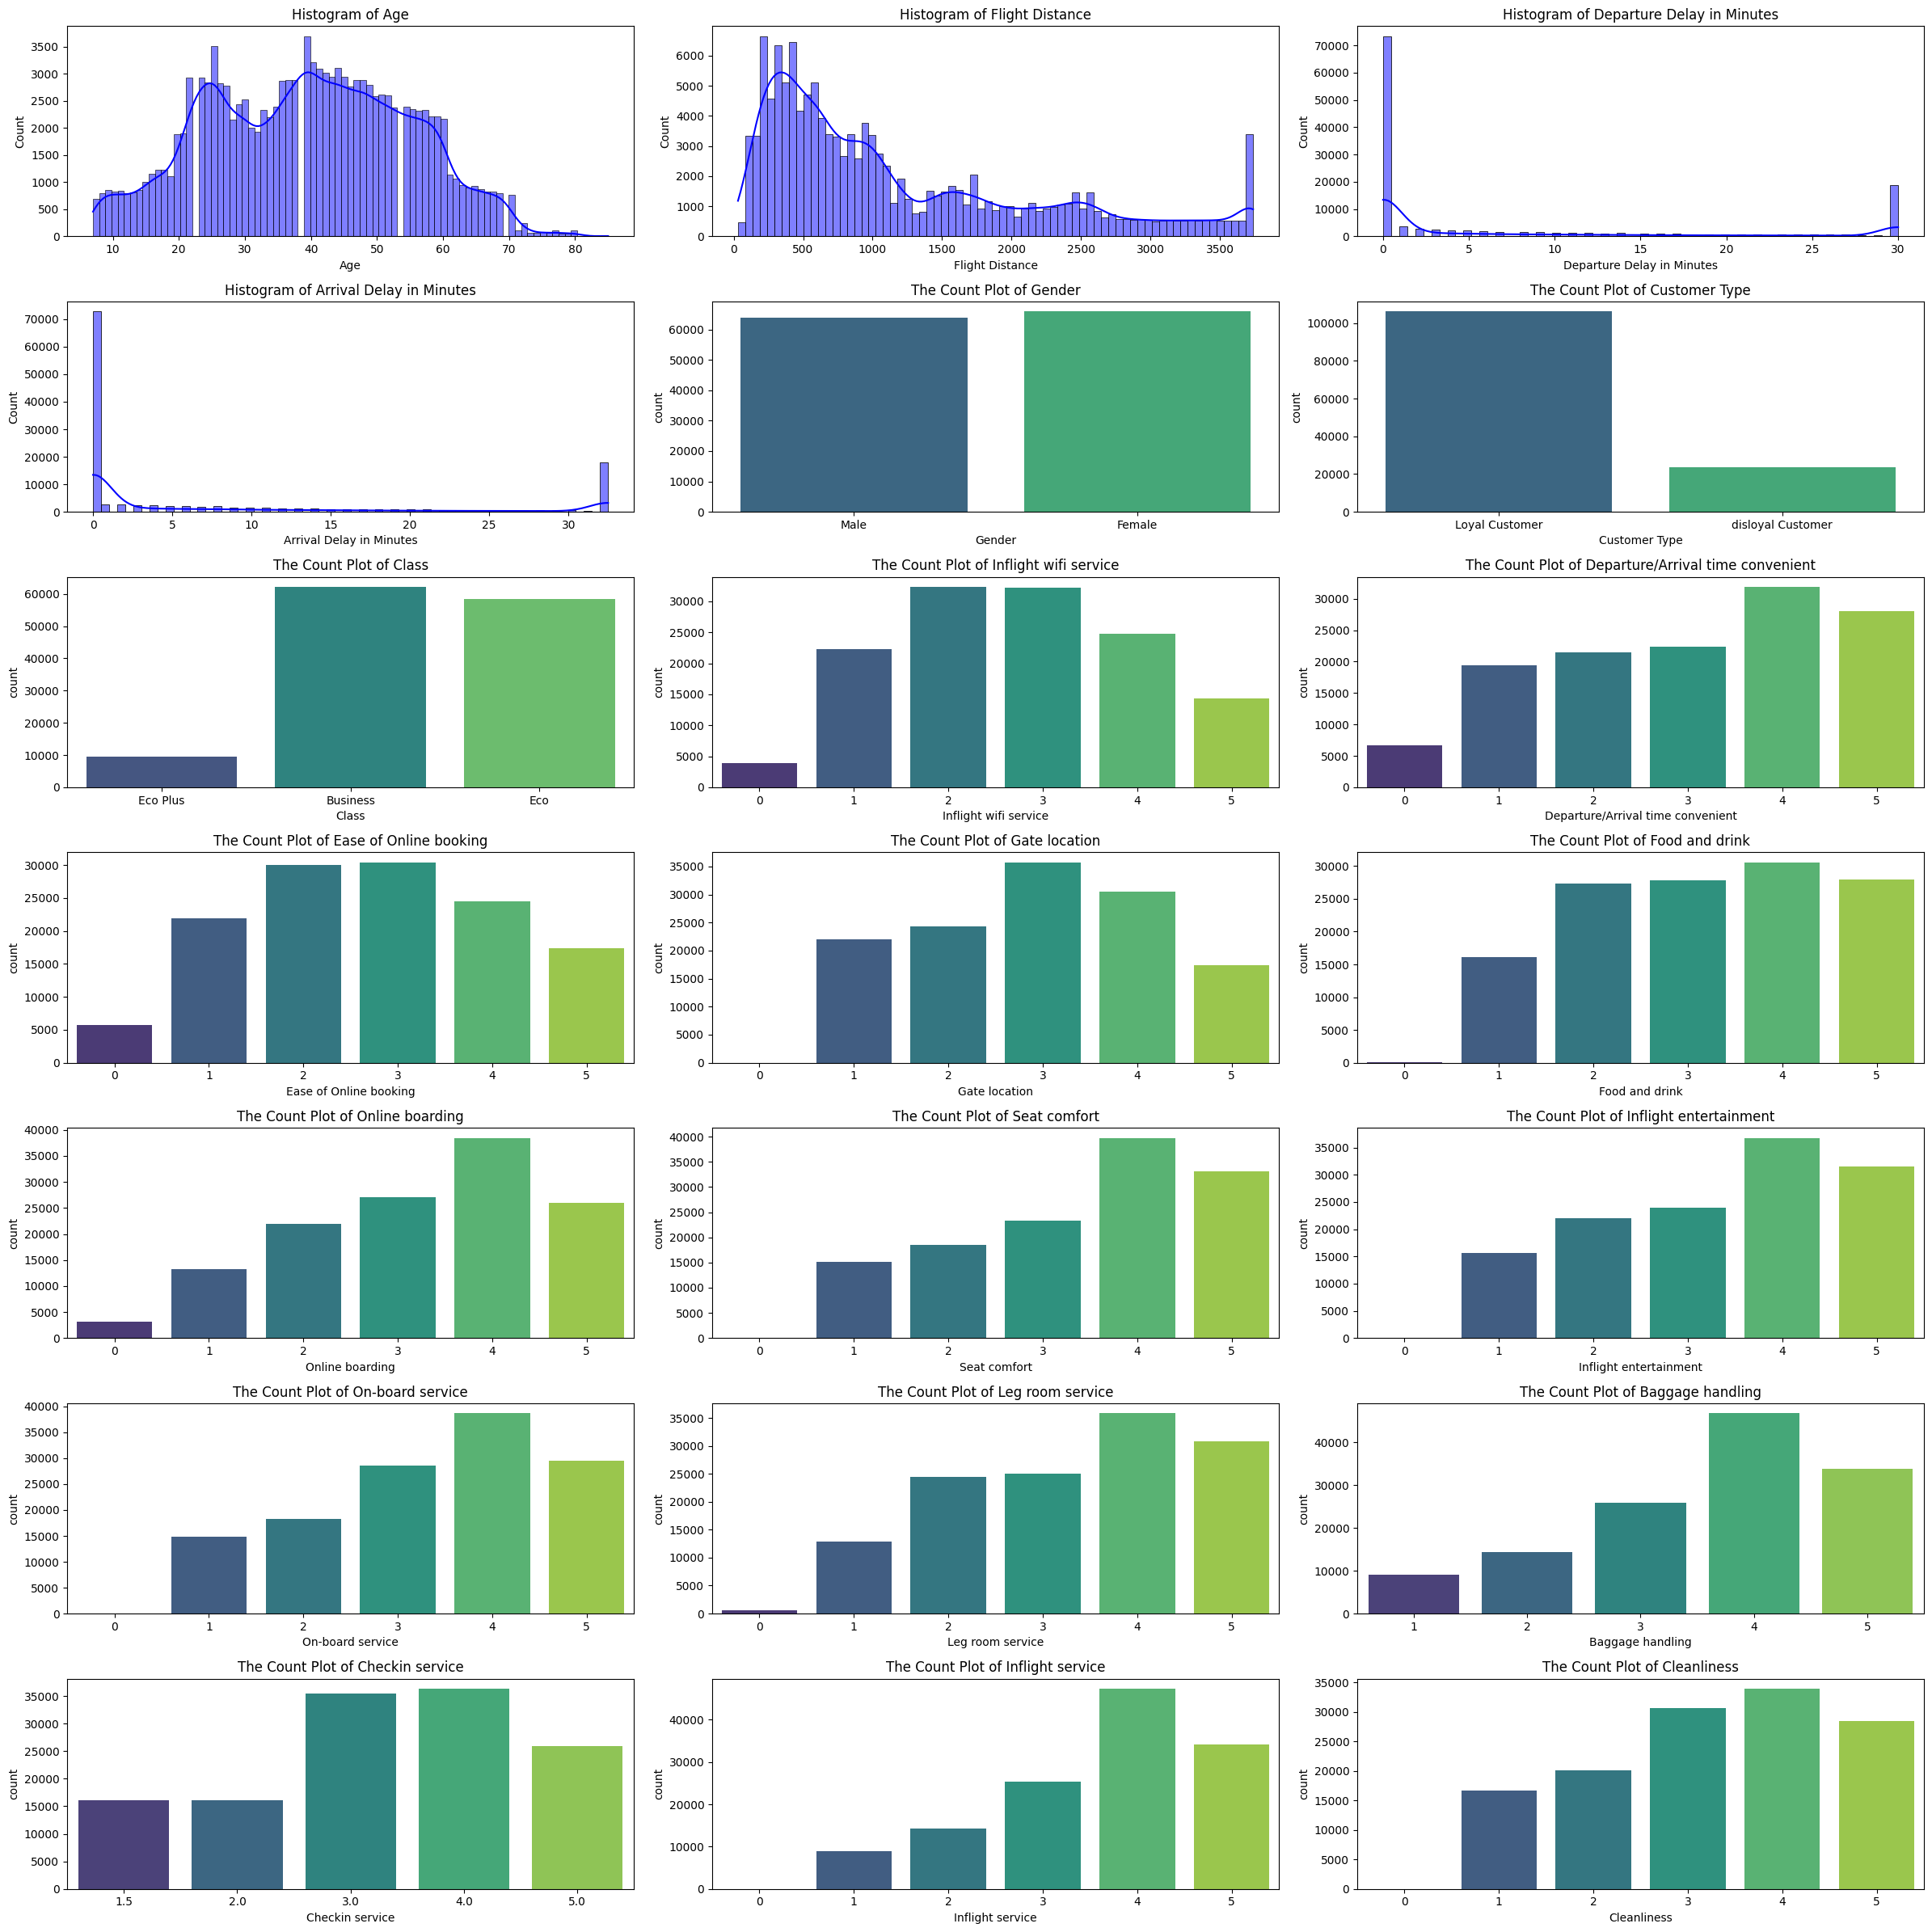

In [41]:
fig, axes = plt.subplots(nrows = 7, ncols=3, figsize=(24,24))
axes = axes.flatten()

# histogram for numerical features
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col],ax=axes[i],kde = True, color = 'blue')
    axes[i].set_title(f'Histogram of {col}')

# count plot for categorical features
for j, col in enumerate(categorical_columns):
    if i + 1 + j < len(axes):
        sns.countplot(x=df[col],ax=axes[i+1+j], palette = 'viridis')
        axes[i+1+j].set_title(f'The Count Plot of {col}')

plt.tight_layout()
plt.show()

# Bivariate EDA

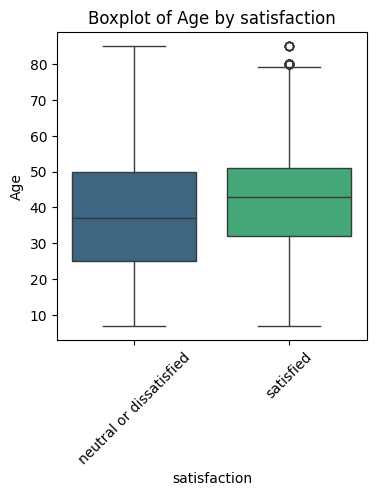

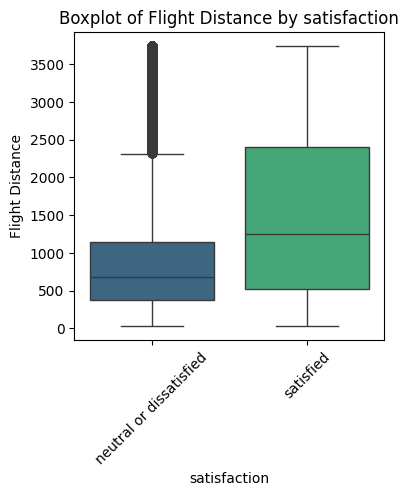

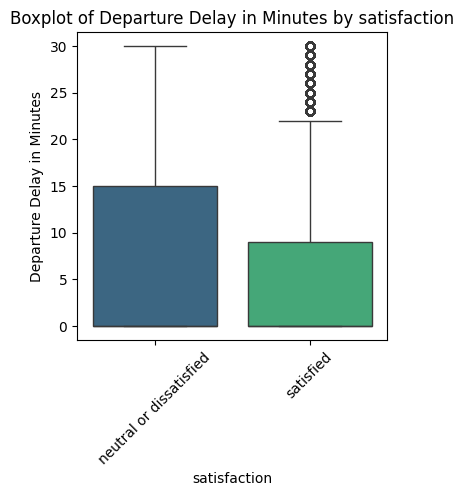

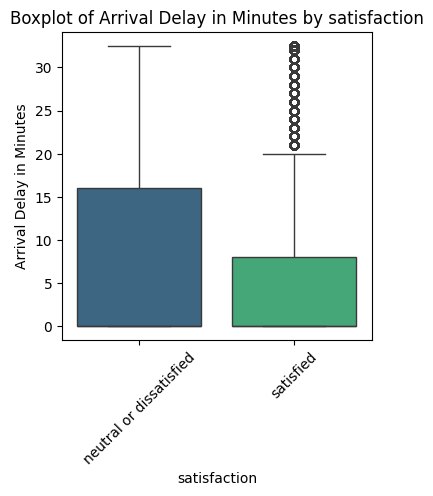

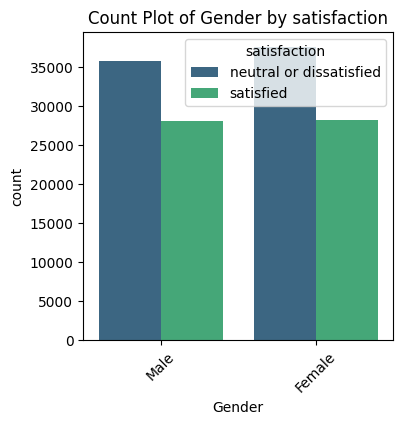

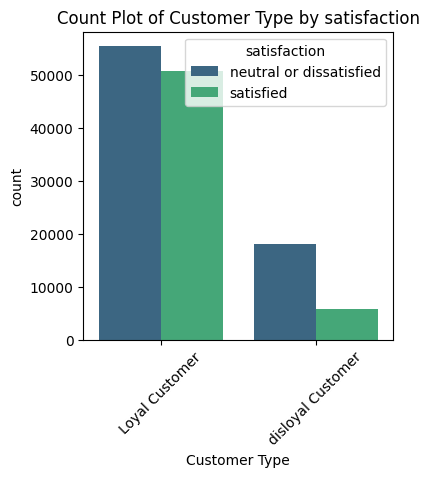

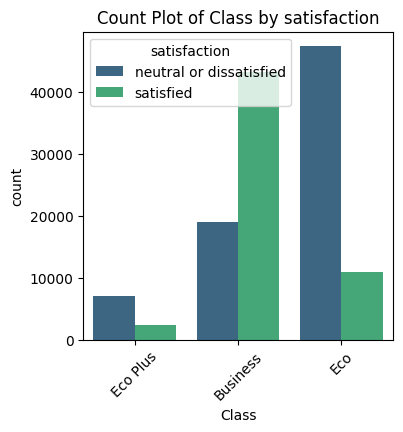

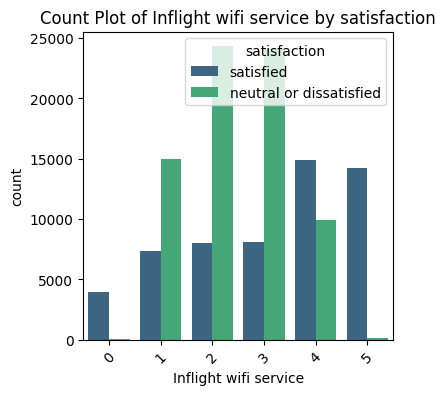

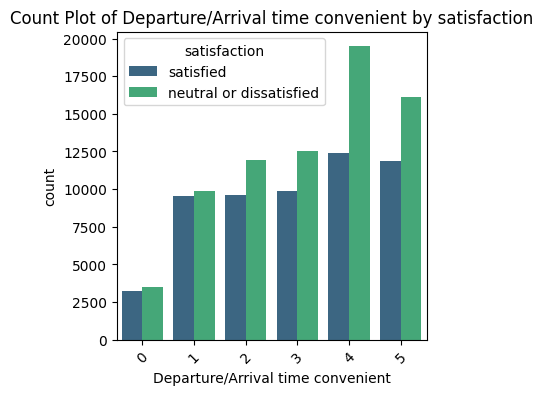

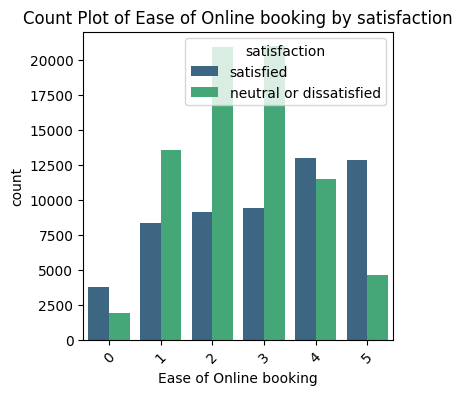

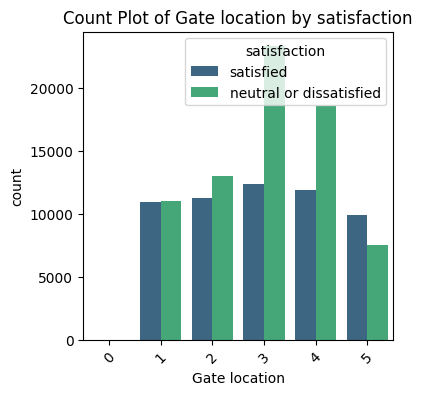

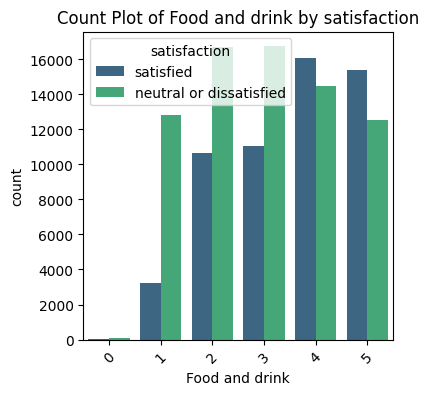

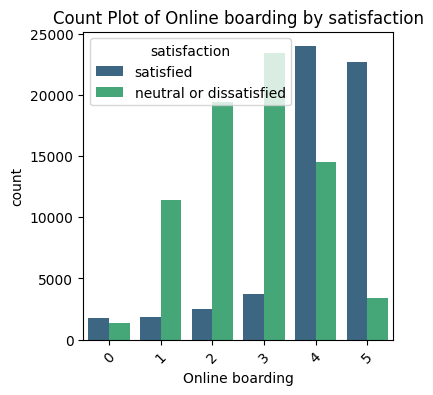

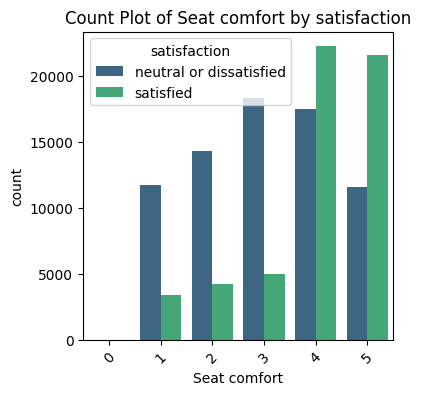

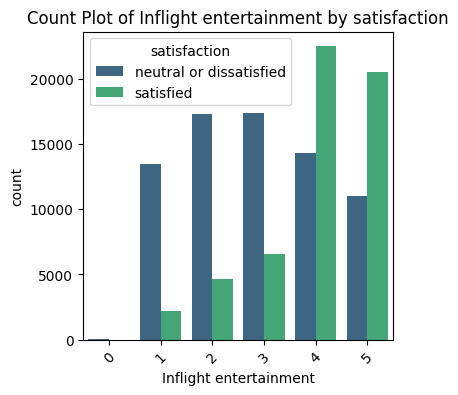

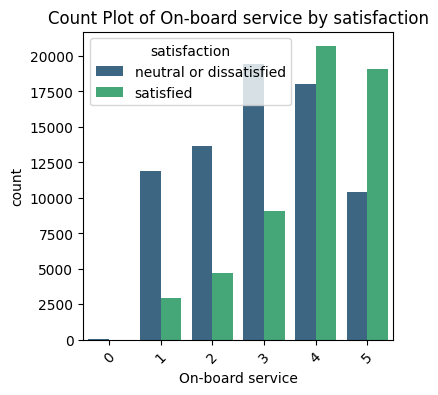

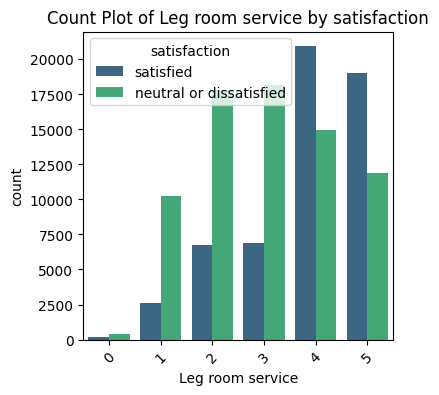

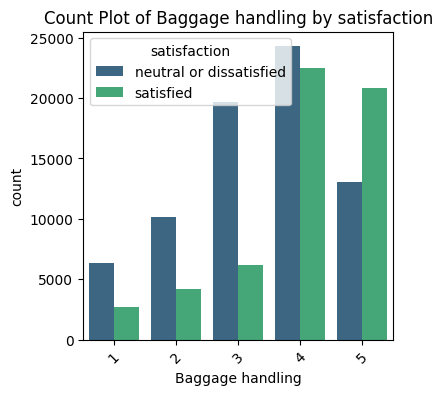

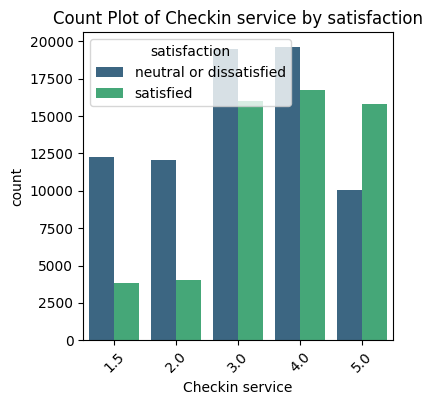

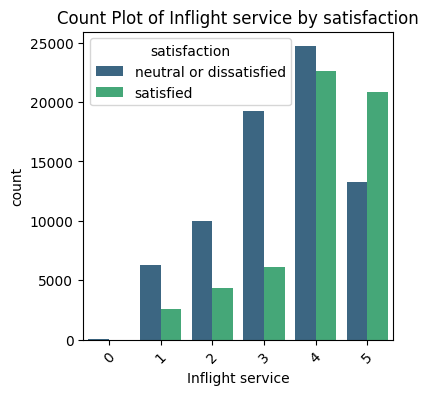

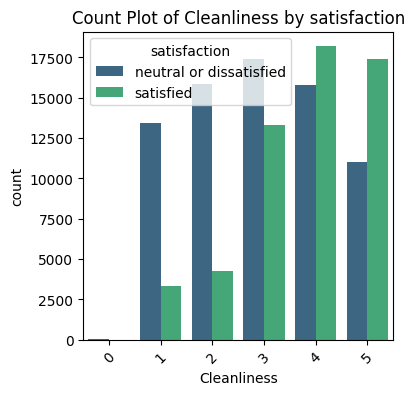

In [42]:
target_column = 'satisfaction'
# Numerical vs. Target Column
for col in numerical_columns:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x=df[target_column], y=df[col], palette='viridis')
    plt.title(f'Boxplot of {col} by {target_column}')
    plt.xticks(rotation=45)
    plt.show()

# Categorical vs. target Column
for col in categorical_columns:
    plt.figure(figsize=(4, 4))
    sns.countplot(x=df[col], hue=df[target_column], palette='viridis')
    plt.title(f'Count Plot of {col} by {target_column}')
    plt.xticks(rotation=45)
    plt.show()

# Multivarite EDA

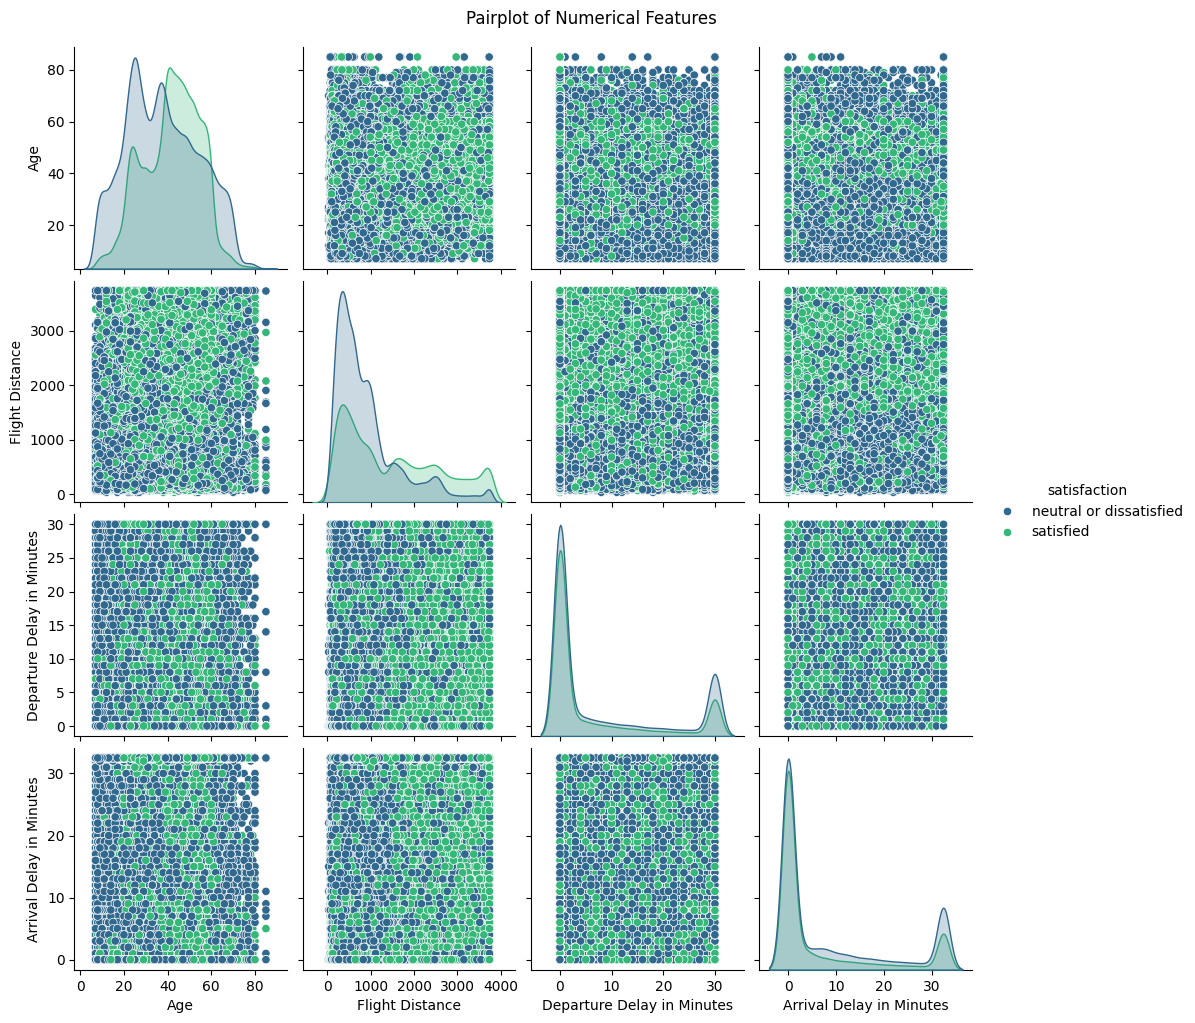

In [43]:
sns.pairplot(df[numerical_columns + [target_column]], hue=target_column, palette='viridis')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Important Insights
* Majority of people who travel are from Age-group 20-40 . This age group is of youngsters like students , working professionals , tourists , buisness man, etc.
* Most of people only tavel for upto 1000km distance. As only tourist people travel for long distances.
* Most of flights are not delayed but if they are delayed they are delayed for more than 30 minutes.Gnerally flights are delayed due to extreme weather conditions and if weather is bad it generally remains bad for quite a time.
* Females travel slightly more than Males.
* Most of flight customers are loyal which means they have taken thsi flight previously too.
* Most of people travel for buisness purposes.
* Most people travel in Buisness and Eco Class . Eco Plus price is generally between these two classes and just offfers some basic amenities like leg-room , etc which many people dont find valuable enough.
* Flight wifi service is average . They should make it better.
* They should focus on their online booking technolgy as people are facing problem due to this.
* Seat Comfort and Inflight service is also not that good.

# Feature Engineering

In [44]:
# Feature Construction
df['Total Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

In [45]:
df['Delay Ratio'] = df['Total Delay']/(df['Flight Distance'] + 1)

In [46]:
df.head()

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio
0,Male,Loyal Customer,13,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,43.0,0.093275
1,Male,disloyal Customer,25,Business,235,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0,neutral or dissatisfied,7.0,0.029661
2,Female,Loyal Customer,26,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,satisfied,0.0,0.000000
3,Female,Loyal Customer,25,Business,562,2,5,5,5,2,2,2,2,2,5,3,1.5,4,2,11,9.0,neutral or dissatisfied,20.0,0.035524
4,Male,Loyal Customer,61,Business,214,3,3,3,3,4,5,5,3,3,4,4,3.0,3,3,0,0.0,satisfied,0.0,0.000000


In [47]:
# Converted the Age using Binning
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50,100], labels=['Child', 'Youngster', 'Adult', 'Senior'])

In [48]:
df.head()

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio,Age Group
0,Male,Loyal Customer,13,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,43.0,0.093275,Child
1,Male,disloyal Customer,25,Business,235,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0,neutral or dissatisfied,7.0,0.029661,Youngster
2,Female,Loyal Customer,26,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,satisfied,0.0,0.000000,Youngster
3,Female,Loyal Customer,25,Business,562,2,5,5,5,2,2,2,2,2,5,3,1.5,4,2,11,9.0,neutral or dissatisfied,20.0,0.035524,Youngster
4,Male,Loyal Customer,61,Business,214,3,3,3,3,4,5,5,3,3,4,4,3.0,3,3,0,0.0,satisfied,0.0,0.000000,Senior


In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_encounter = ['Gender','Customer Type','satisfaction','Class','Age Group']
label_mappings = {}

for col in columns_to_encounter:
    df[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_,le.transform(le.classes_)))

for col, mapping in label_mappings.items():
    print(f'Mapping for {col}: {mapping}')

Mapping for Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Mapping for Customer Type: {'Loyal Customer': np.int64(0), 'disloyal Customer': np.int64(1)}
Mapping for satisfaction: {'neutral or dissatisfied': np.int64(0), 'satisfied': np.int64(1)}
Mapping for Class: {'Business': np.int64(0), 'Eco': np.int64(1), 'Eco Plus': np.int64(2)}
Mapping for Age Group: {'Adult': np.int64(0), 'Child': np.int64(1), 'Senior': np.int64(2), 'Youngster': np.int64(3)}


In [50]:
df.head()

,Gender,Customer Type,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio,Age Group
0,1,0,13,2,460,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,0,43.0,0.093275,1
1,1,1,25,0,235,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0,0,7.0,0.029661,3
2,0,0,26,0,1142,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,1,0.0,0.000000,3
3,0,0,25,0,562,2,5,5,5,2,2,2,2,2,5,3,1.5,4,2,11,9.0,0,20.0,0.035524,3
4,1,0,61,0,214,3,3,3,3,4,5,5,3,3,4,4,3.0,3,3,0,0.0,1,0.0,0.000000,2


In [51]:
# Feature Selection

from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis = 1)
y = df['satisfaction']

X_train, X_test,y_train,y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

In [52]:
from sklearn.feature_selection import mutual_info_classif

# calculated mutual information 
mutual_info = mutual_info_classif(X_train,y_train,discrete_features = True)

# created a dataframe for mutual information
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
}).sort_values(by='Mutual Information',ascending=False)

print(mutual_info_df)


                              Feature  Mutual Information
10                    Online boarding            0.210734
22                        Delay Ratio            0.178960
5               Inflight wifi service            0.162041
3                               Class            0.133414
12             Inflight entertainment            0.093588
4                     Flight Distance            0.079630
11                       Seat comfort            0.078683
14                   Leg room service            0.060017
13                   On-board service            0.057306
18                        Cleanliness            0.052694
7              Ease of Online booking            0.050173
2                                 Age            0.045925
15                   Baggage handling            0.043086
17                   Inflight service            0.041135
16                    Checkin service            0.032511
9                      Food and drink            0.026723
23            

In [53]:
top_features = mutual_info_df.head(11)['Feature'].tolist()
top_features

['Online boarding',
 'Delay Ratio',
 'Inflight wifi service',
 'Class',
 'Inflight entertainment',
 'Flight Distance',
 'Seat comfort',
 'Leg room service',
 'On-board service',
 'Cleanliness',
 'Ease of Online booking']

In [54]:
final_df = df[top_features + ['satisfaction']]

In [55]:
final_df.head(3)

,Online boarding,Delay Ratio,Inflight wifi service,Class,Inflight entertainment,Flight Distance,Seat comfort,Leg room service,On-board service,Cleanliness,Ease of Online booking,satisfaction
0,3,0.093275,3,2,5,460,5,3,4,5,3,0
1,3,0.029661,3,0,1,235,1,5,1,1,3,0
2,5,0.000000,2,0,5,1142,5,3,4,5,2,1


In [56]:
# Checking of imbalanced data
final_df['satisfaction'].value_counts()

satisfaction
0    73452
1    56428
Name: count, dtype: int64

# Model Training

In [57]:
final_df.columns

Index(['Online boarding', 'Delay Ratio', 'Inflight wifi service', 'Class',
       'Inflight entertainment', 'Flight Distance', 'Seat comfort',
       'Leg room service', 'On-board service', 'Cleanliness',
       'Ease of Online booking', 'satisfaction'],
      dtype='object')

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb

# Sample 10 % of the data
df_sample = final_df.sample(frac = 0.05, random_state = 42)

# Prepared the sample data
X_sample = final_df.drop(columns = 'satisfaction', axis = 1)
y_sample = final_df['satisfaction']


# Split the sample data
X_train_sample, X_test_sample,y_train_sample,y_test_sample = train_test_split(X_sample,y_sample, random_state = 42, test_size = 0.2)

# Initialized classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Random Forest': RandomForestClassifier(n_estimators = 50, n_jobs = -1),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric = 'mlogloss')
}

# Train and evaluated each classifier
results={}
for name, clf in classifiers.items():
    clf.fit(X_train_sample,y_train_sample)
    y_pred = clf.predict(X_test_sample)
    accuracy = accuracy_score(y_test_sample,y_pred)
    results[name] = accuracy

# print results
for name, accuracy in results.items():
    print(f'{name}: {accuracy:.4f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 45074, number of negative: 58830
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 561
[LightGBM] [Info] Number of data points in the train set: 103904, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433804 -> initscore=-0.266346
[LightGBM] [Info] Start training from score -0.266346
Logistic Regression: 0.8099
Gradient Boosting: 0.9061
AdaBoost: 0.8969
Random Forest: 0.9342
Support Vector Classifier: 0.6623
K-Nearest Neighbors: 0.8559
Naive Bayes: 0.8238
Decision Tree: 0.9098
LightGBM: 0.9356
XGBoost: 0.9362


In [59]:
### LGBM is the best model for us 

In [60]:
### Makin of LGBM model

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix
import lightgbm as lgb

In [62]:
X = final_df.drop(columns = 'satisfaction',axis =1)
y = final_df['satisfaction']

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [64]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 45074, number of negative: 58830
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 561
[LightGBM] [Info] Number of data points in the train set: 103904, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433804 -> initscore=-0.266346
[LightGBM] [Info] Start training from score -0.266346


LGBMClassifier()

In [65]:
y_pred = lgbm_model.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
f1 = f1_score(y_test,y_pred,average = 'weighted')

In [67]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9356
Precision: 0.9358
Recall: 0.9356
F1 Score: 0.9354


# Model Saving

In [75]:
import pickle
with open('lgbm_model.pkl', 'wb') as file:
    pickle.dump(lgbm_model,file)

# Model Loading and Testing

In [69]:
with open('lgbm_model.pkl','rb') as file:
    loaded_model = pickle.load(file)

In [70]:
X_train[30:32]

,Online boarding,Delay Ratio,Inflight wifi service,Class,Inflight entertainment,Flight Distance,Seat comfort,Leg room service,On-board service,Cleanliness,Ease of Online booking
113104,5,0.02603,4,0,5,1747,5,5,5,5,4
102378,3,0.00000,5,0,5,1846,4,5,5,4,3


In [71]:
y_train[30:32]

113104    1
102378    1
Name: satisfaction, dtype: int64

In [72]:
X_new = np.array([
    [5,	0.02603,	4,	0,	5,	1747,	5,	5,	5,	5,	4],
    [3,	0.00000,	5,	0,	5,	1846,	4,	5,	5,	4,	3]
])

In [73]:
y_pred_new = loaded_model.predict(X_new)

In [74]:
print('Predictions:', y_pred_new)

Predictions: [1 1]
